**Install pycaret into environment**

In [1]:
!pip install uv
!uv pip install pycaret[full] --system

Streaming output truncated to the last 5000 lines.
aiofiles   ------------------------------ 15.73 kB/15.73 kB
ansi2html  ------------------------------ 17.61 kB/17.61 kB
adagio     ------------------------------ 16.38 kB/19.07 kB
python-dotenv ------------------------------ 15.28 kB/19.86 kB
pydub      ------------------------------ 32.09 kB/32.33 kB
tomlkit    ------------------------------ 37.33 kB/37.33 kB
tbats      ------------------------------ 32.77 kB/44.00 kB
Building htmlmin==0.1.12
⠧ Preparing packages... (71/145)
m2cgen     ------------------------------ 81.57 kB/92.24 kB
visions    ------------------------------ 65.00 kB/104.83 kB
graphene   ------------------------------ 112.34 kB/128.23 kB
ydata-profiling ------------------------------ 356.19 kB/356.19 kB
litestar   ------------------------------ 323.97 kB/538.37 kB
jedi       ------------------------------ 294.42 kB/1.57 MB
faker      ------------------------------ 619.74 kB/1.83 MB
pmdarima   -------------------------

**Mount google drive and copy kaggle.json to machine**

In [2]:
from google.colab import drive
drive.mount('mount')

Mounted at mount


In [3]:
!cp mount/MyDrive/kaggle.json .
!ls

kaggle.json  mount  sample_data


**Acquire the students dataset from kaggle and extract zip**

I am using this dataset uploaded from June 2024 on kaggle:

https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [4]:
!KAGGLE_CONFIG_DIR=$(pwd) kaggle datasets download rabieelkharoua/students-performance-dataset
!unzip -o students-performance-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 14.1MB/s]
Archive:  students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


**Rename the csv to remove space in filename**

In [5]:
!ls
!mv 'Student_performance_data _.csv' Student_performance_data_.csv
!head 'Student_performance_data_.csv'

 kaggle.json   sample_data			 students-performance-dataset.zip
 mount	      'Student_performance_data _.csv'
StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1001,17,1,0,2,19.833722807854713,7,1,2,0,0,1,0,2.929195591667681,2.0
1002,18,0,0,1,15.40875605584674,0,0,1,0,0,0,0,3.042914833436377,1.0
1003,15,0,2,3,4.21056976881226,26,0,2,0,0,0,0,0.1126022544661815,4.0
1004,17,1,0,3,10.028829473958215,14,0,3,1,0,0,0,2.0542181397029484,3.0
1005,17,1,0,2,4.6724952729713305,17,1,3,0,0,0,0,1.2880611817953875,4.0
1006,18,0,0,1,8.191218545250186,0,0,1,1,0,0,0,3.0841836144863937,1.0
1007,15,0,1,1,15.601680474699295,10,0,3,0,1,0,0,2.748237414891583,2.0
1008,15,1,1,4,15.424496305808074,22,1,1,1,0,0,0,1.360142712316461,4.0
1009,17,0,0,0,4.562007558047703,1,0,2,0,1,0,1,2.896819189513569,2.0


**Load the csv into a pandas dataframe**

In [6]:
import pandas as pd
data = pd.read_csv('Student_performance_data_.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [7]:
data = data.drop(['GPA', 'StudentID'], axis=1)
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


**Import pycaret and setup a classification experiment**

In [8]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

# init setup on exp
exp.setup(data, target = 'GradeClass', session_id = 1337, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,1337
1,Target,GradeClass
2,Target type,Multiclass
3,Original data shape,"(2392, 13)"
4,Transformed data shape,"(2392, 13)"
5,Transformed train set shape,"(1674, 13)"
6,Transformed test set shape,"(718, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [9]:
exp.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [10]:
exp.get_config('train_transformed').head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
1224,15.0,0.0,1.0,2.0,9.980723,28.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0
2278,15.0,1.0,0.0,2.0,17.188692,4.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0
1828,16.0,0.0,0.0,1.0,12.600692,7.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0
2212,16.0,1.0,2.0,2.0,9.242809,23.0,1.0,3.0,1.0,0.0,0.0,0.0,4.0
1351,18.0,0.0,0.0,1.0,15.627125,14.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0


In [11]:
exp.get_config('test_transformed').head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
1703,17.0,0.0,0.0,1.0,4.286002,14.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0
562,17.0,1.0,3.0,0.0,13.305457,29.0,1.0,3.0,0.0,0.0,1.0,0.0,4.0
113,16.0,0.0,0.0,1.0,16.849281,18.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0
1726,18.0,1.0,0.0,0.0,15.610436,26.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0
1254,15.0,1.0,0.0,1.0,3.981646,20.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0


In [12]:
print("Data length: ", len(data))
print("Train Data length: ", len(exp.get_config('train_transformed')))
print("Test Data length: ", len(exp.get_config('test_transformed')))
print()

if len(data) == len(exp.get_config('train_transformed')) + len(exp.get_config('test_transformed')):
  print("Lengths match as expected")

Data length:  2392
Train Data length:  1674
Test Data length:  718

Lengths match as expected


<Axes: >

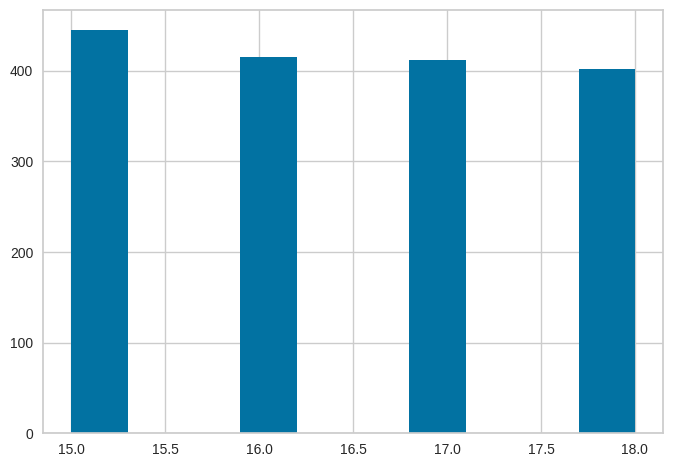

In [13]:
exp.get_config('train_transformed')['Age'].hist()

<Axes: >

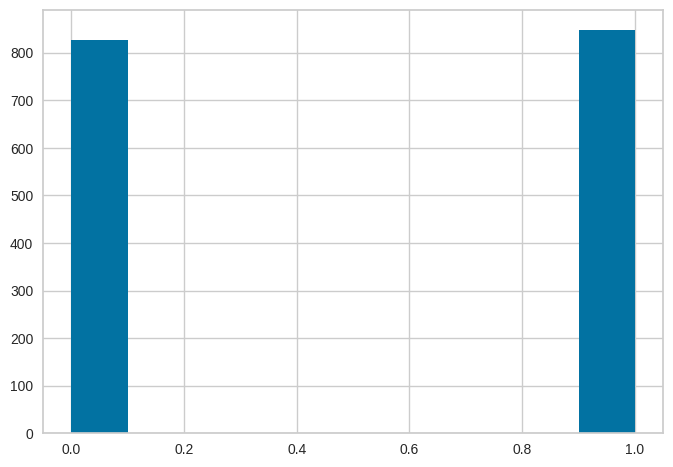

In [14]:
exp.get_config('train_transformed')['Gender'].hist()

<Axes: >

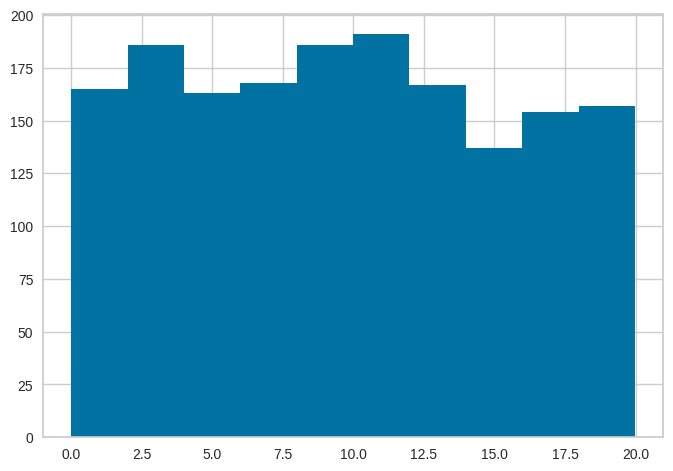

In [15]:
exp.get_config('train_transformed')['StudyTimeWeekly'].hist()

**Train models**

In [16]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7247,0.9034,0.7247,0.7130,0.7146,0.5811,0.5831,8.5520
lr,Logistic Regression,0.7133,0.0000,0.7133,0.6874,0.6935,0.5590,0.5624,0.3410
rf,Random Forest Classifier,0.7079,0.8967,0.7079,0.6925,0.6928,0.5534,0.5562,0.4630
lda,Linear Discriminant Analysis,0.7079,0.0000,0.7079,0.6917,0.6920,0.5552,0.5579,0.0390
lightgbm,Light Gradient Boosting Machine,0.7061,0.8949,0.7061,0.6990,0.6974,0.5534,0.5551,0.3050
xgboost,Extreme Gradient Boosting,0.7043,0.8930,0.7043,0.6967,0.6964,0.5524,0.5542,0.8700
gbc,Gradient Boosting Classifier,0.7037,0.0000,0.7037,0.6976,0.6956,0.5512,0.5529,1.3050
qda,Quadratic Discriminant Analysis,0.6954,0.0000,0.6954,0.6919,0.6879,0.5415,0.5430,0.0390
et,Extra Trees Classifier,0.6870,0.8895,0.6870,0.6645,0.6688,0.5146,0.5187,0.2970
knn,K Neighbors Classifier,0.6780,0.8614,0.6780,0.6701,0.6704,0.5132,0.5148,0.0620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

**Evaluate Model**

In [17]:
exp.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Predict on test data using Model**

In [18]:
predict_holdout = exp.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7201,0.8872,0.7201,0.7157,0.7084,0.5730,0.5748


In [19]:
new_data = data.copy()
new_data = new_data.drop('GradeClass', axis=1)

In [20]:
predictions = exp.predict_model(best, data=new_data)
predictions.head(10)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,prediction_label,prediction_score
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2,0.9632
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1,0.6829
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4,0.9965
3,17,1,0,3,10.028830,14,0,3,1,0,0,0,3,0.8925
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4,0.9794
5,18,0,0,1,8.191218,0,0,1,1,0,0,0,2,0.9432
6,15,0,1,1,15.601681,10,0,3,0,1,0,0,2,0.5759
7,15,1,1,4,15.424497,22,1,1,1,0,0,0,4,0.9903
8,17,0,0,0,4.562007,1,0,2,0,1,0,1,2,0.8014
9,16,1,0,1,18.444466,0,0,3,1,0,0,0,0,0.9044


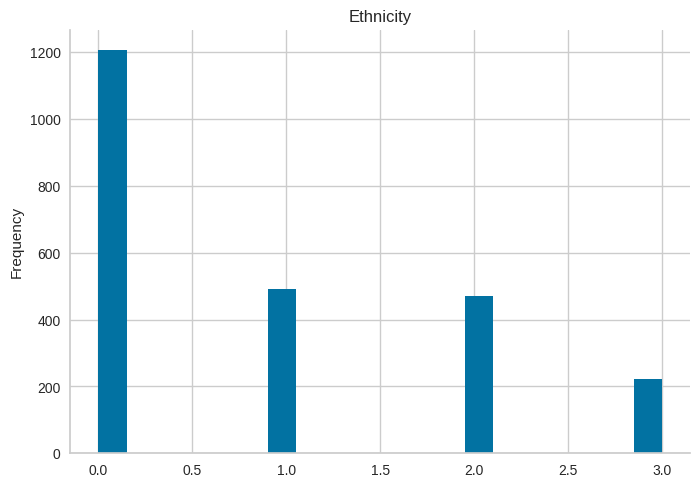

In [21]:
# @title Ethnicity

from matplotlib import pyplot as plt
predictions['Ethnicity'].plot(kind='hist', bins=20, title='Ethnicity')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Save the model to disk**

In [22]:
# save pipeline
exp.save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Ethnicity',
                                              'ParentalEducation',
                                              'StudyTimeWeekly', 'Absences',
                                              'Tutoring', 'ParentalSupport',
                                              'Extracurricular', 'Sports',
                                              'Music', 'Volunteering'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
               

**Further tune the model**

In [23]:
tuned_best_model = exp.tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7321,0.9173,0.7321,0.6976,0.7130,0.5911,0.5937
1,0.7500,0.9057,0.7500,0.7463,0.7421,0.6248,0.6259
2,0.7202,0.9225,0.7202,0.7414,0.7116,0.5779,0.5800
3,0.7321,0.9076,0.7321,0.7337,0.7116,0.5860,0.5910
4,0.7186,0.8910,0.7186,0.6973,0.7011,0.5608,0.5645
5,0.7365,0.9022,0.7365,0.7237,0.7252,0.5956,0.5971
6,0.7725,0.9358,0.7725,0.7786,0.7737,0.6570,0.6574
7,0.7605,0.9010,0.7605,0.7605,0.7505,0.6334,0.6356
8,0.7425,0.8987,0.7425,0.7118,0.7261,0.6102,0.6119


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
exp.save_model(tuned_best_model, 'tuned_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Ethnicity',
                                              'ParentalEducation',
                                              'StudyTimeWeekly', 'Absences',
                                              'Tutoring', 'ParentalSupport',
                                              'Extracurricular', 'Sports',
                                              'Music', 'Volunteering'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
               

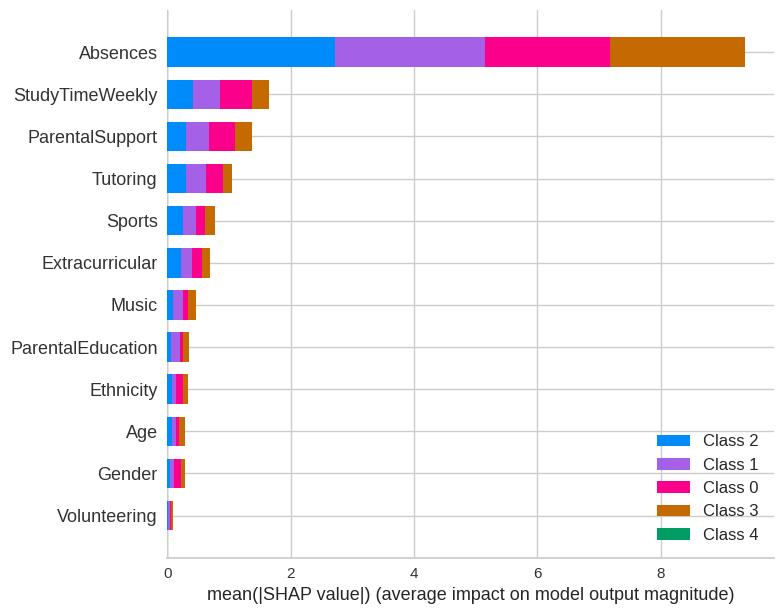

In [25]:
exp.interpret_model(tuned_best_model, plot = 'summary')

In [26]:
tuned_best_model_from_disk = exp.load_model('tuned_best_model')

Transformation Pipeline and Model Successfully Loaded


**Explainer Dashboard**

In [27]:
exp.dashboard(tuned_best_model_from_disk, display_format ='inline')

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/718 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Generate gradio application**

In [28]:
from pycaret.classification import *

setup(data, target = 'GradeClass', session_id = 1337, use_gpu=True)
create_app(tuned_best_model_from_disk)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,1337
1,Target,GradeClass
2,Target type,Multiclass
3,Original data shape,"(2392, 13)"
4,Transformed data shape,"(2392, 13)"
5,Transformed train set shape,"(1674, 13)"
6,Transformed test set shape,"(718, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

**Finalize best model**

In [29]:
final_best = exp.finalize_model(tuned_best_model_from_disk)
exp.save_model(final_best, 'final_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Ethnicity',
                                              'ParentalEducation',
                                              'StudyTimeWeekly', 'Absences',
                                              'Tutoring', 'ParentalSupport',
                                              'Extracurricular', 'Sports',
                                              'Music', 'Volunteering'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...ures=False,
                                                               missing_values=nan,
            